In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from prettytable import PrettyTable

In [47]:
# Les inn data
data = pd.read_csv('./results.csv')

# Sorter data basert på Model og Epochs
data = data.sort_values(['Model', 'Epochs'])

# Opprett mappen "graphs/analysis" hvis den ikke eksisterer
if not os.path.exists('graphs/analysis'):
    os.makedirs('graphs/analysis')

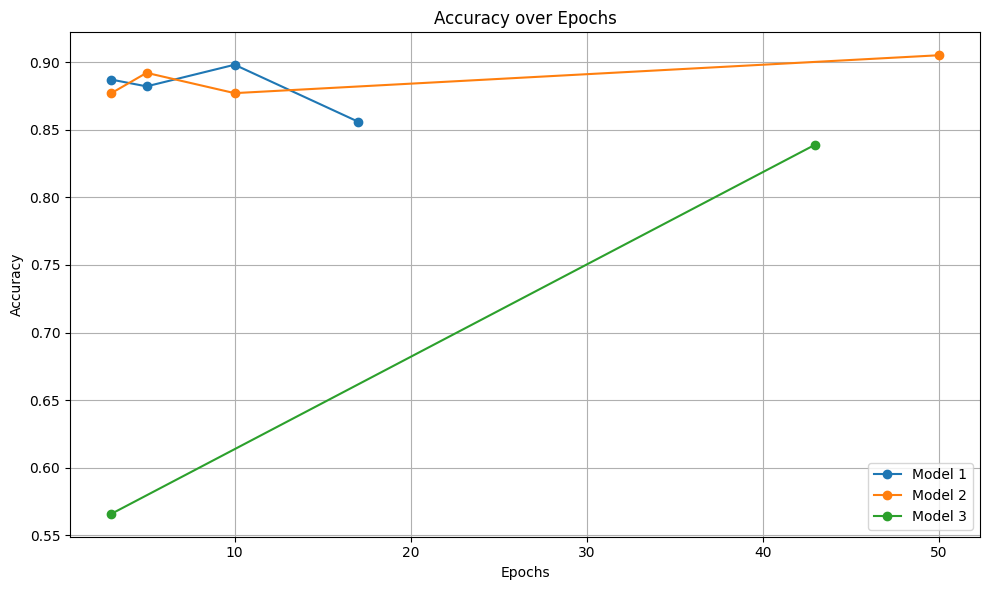

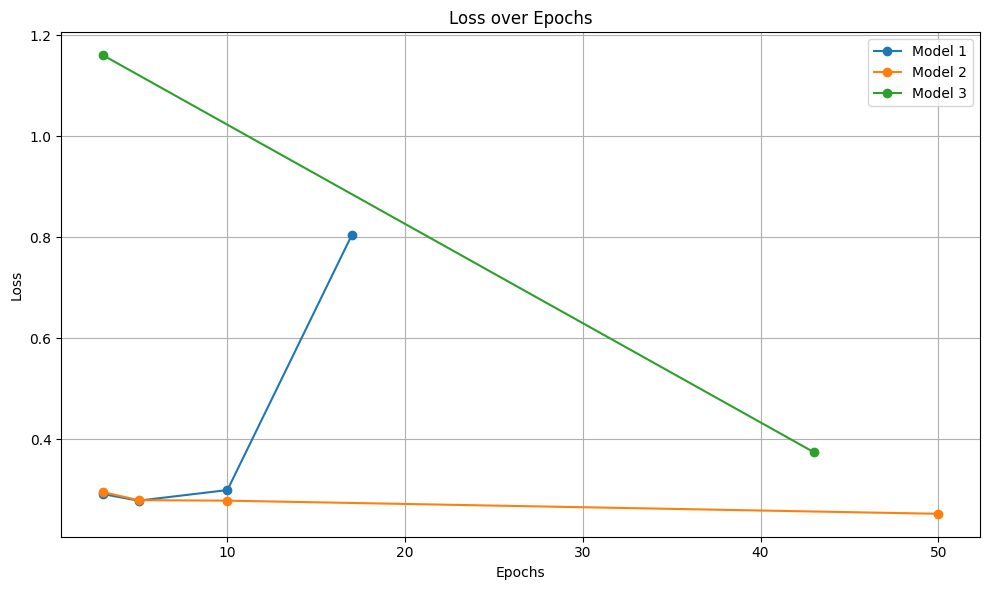

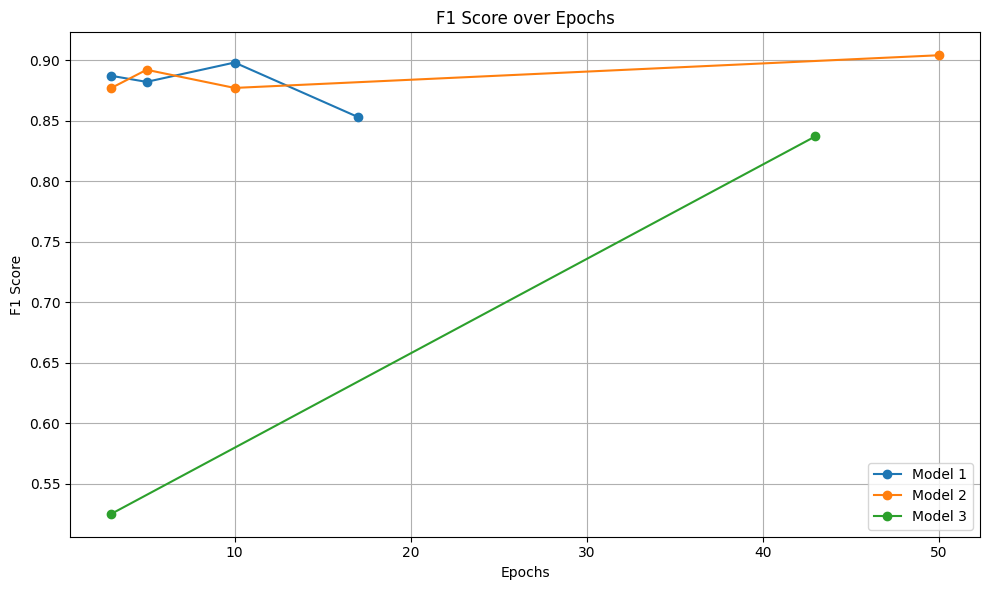

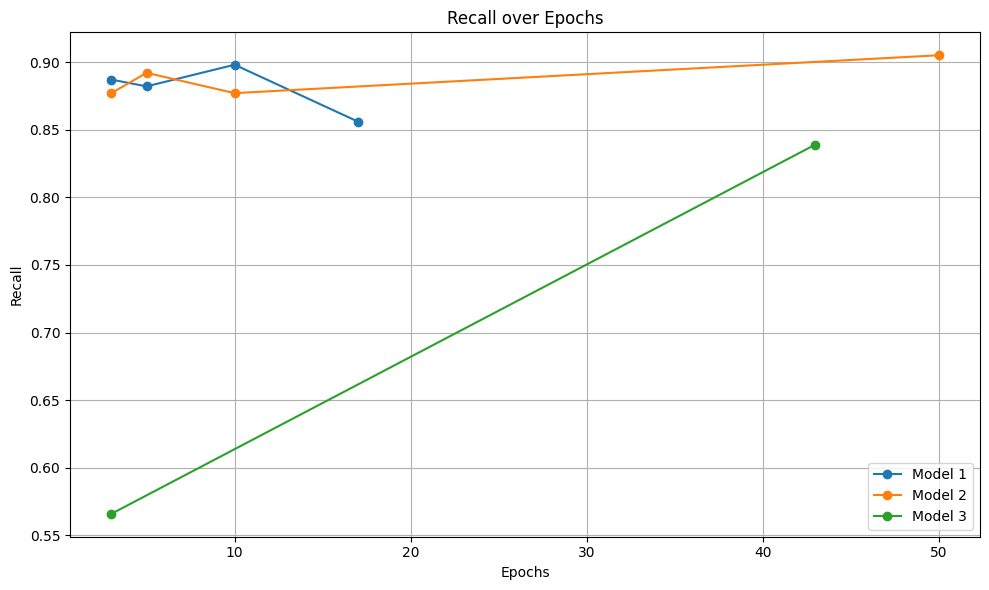

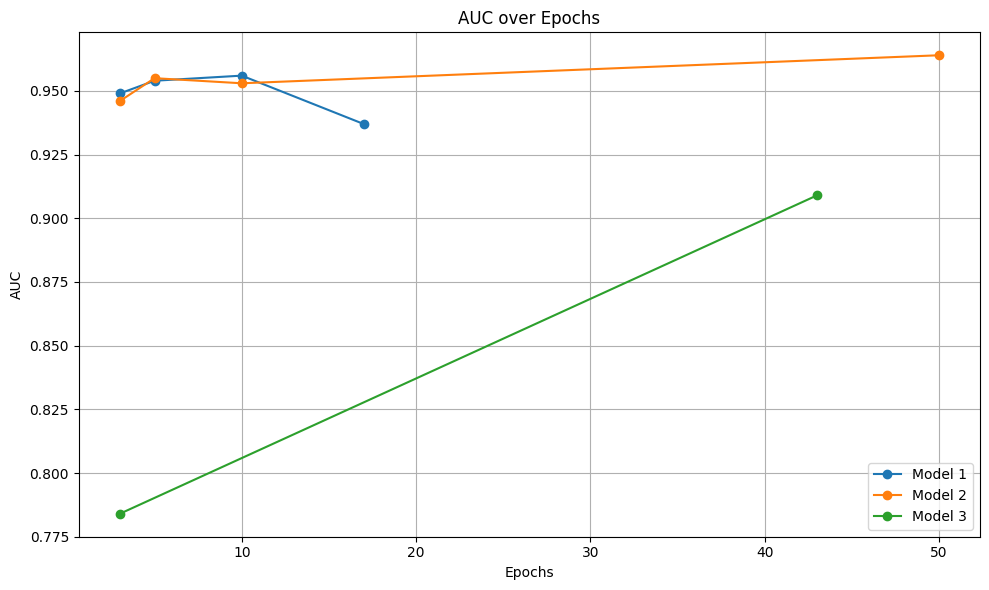

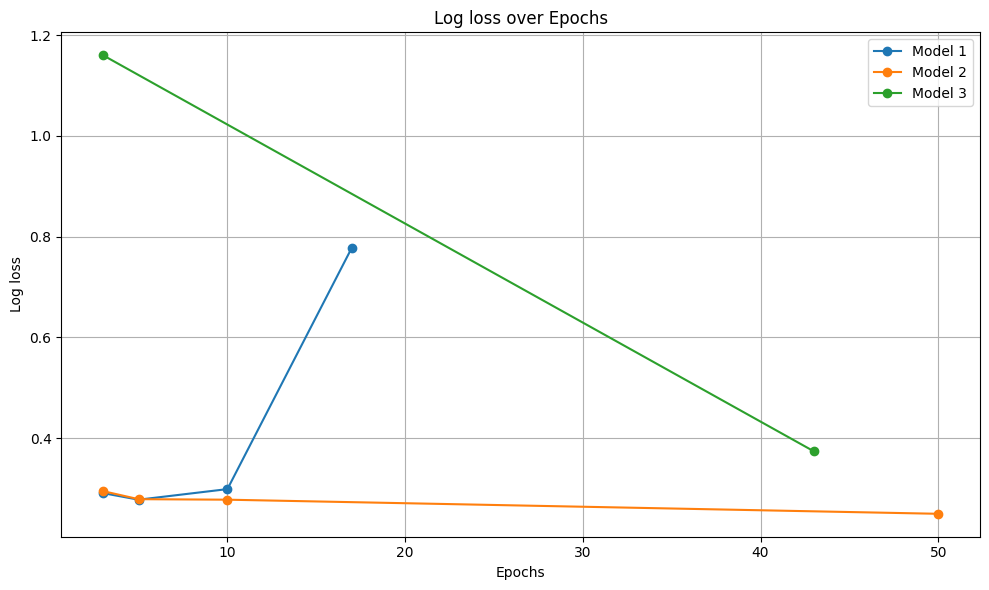

In [56]:
metrics = ["Accuracy", "Loss", "F1 Score", "Recall", "AUC", "Log loss"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    for model_num in data['Model'].unique():
        subset = data[data['Model'] == model_num]
        
        plt.plot(subset['Epochs'], subset[metric], marker='o', label=f'Model {model_num}')
        plt.title(f'{metric} over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.grid(True)
        
    plt.tight_layout()
    plt.savefig(f'graphs/analysis/{metric}_analysis.png')
    plt.show()

In [49]:
# Compute the average performance metrics for each model over all epochs
print("\nAverage performance for each model over all epochs:")
print(data.groupby('Model').mean())



Average performance for each model over all epochs:
       Epochs  Accuracy   Loss  F1 Score   Recall  Log loss     AUC
Model                                                              
1        8.75   0.88075  0.418    0.8800  0.88075    0.4115  0.9490
2       17.00   0.88775  0.276    0.8875  0.88775    0.2755  0.9545
3       23.00   0.70250  0.767    0.6810  0.70250    0.7670  0.8465


In [50]:
# Find out which model performs the best for each individual metric
print("\nBest performing model for each metric:")
for metric in ["Accuracy", "Loss", "F1 Score", "Recall", "AUC"]:
    best_row = data.loc[data[metric].idxmax() if "Loss" not in metric else data[metric].idxmin()]
    print(f"For {metric}: Model {best_row['Model']} (Epoch {best_row['Epochs']}) with value: {best_row[metric]}")



Best performing model for each metric:
For Accuracy: Model 2.0 (Epoch 50.0) with value: 0.905
For Loss: Model 2.0 (Epoch 50.0) with value: 0.252
For F1 Score: Model 2.0 (Epoch 50.0) with value: 0.904
For Recall: Model 2.0 (Epoch 50.0) with value: 0.905
For AUC: Model 2.0 (Epoch 50.0) with value: 0.964


In [51]:
# Check the trend of metrics from the first to the last epoch for each model 
# (i.e., are they improving or deteriorating?)
print("\nTrends in performance improvements across epochs:")
for model_num in data['Model'].unique():
    subset = data[data['Model'] == model_num]
    for metric in ["Accuracy", "Loss"]:
        direction = "increasing" if subset.iloc[-1][metric] > subset.iloc[0][metric] else "decreasing"
        print(f"For Model {model_num}, the trend in {metric} is {direction} from the first to the last epoch.")



Trends in performance improvements across epochs:
For Model 1, the trend in Accuracy is decreasing from the first to the last epoch.
For Model 1, the trend in Loss is increasing from the first to the last epoch.
For Model 2, the trend in Accuracy is increasing from the first to the last epoch.
For Model 2, the trend in Loss is decreasing from the first to the last epoch.
For Model 3, the trend in Accuracy is increasing from the first to the last epoch.
For Model 3, the trend in Loss is decreasing from the first to the last epoch.


In [52]:
# Determine the model and epoch with the highest accuracy
best_accuracy_row = data.loc[data['Accuracy'].idxmax()]
print(f"Best Accuracy: Model {best_accuracy_row['Model']} (Epochs {best_accuracy_row['Epochs']}) with value: {best_accuracy_row['Accuracy']}")

# Determine the model and epoch with the highest AUC
best_auc_row = data.loc[data['AUC'].idxmax()]
print(f"Best AUC: Model {best_auc_row['Model']} (Epochs {best_auc_row['Epochs']}) with value: {best_auc_row['AUC']}")

# Determine the model and epoch with the lowest loss
best_loss_row = data.loc[data['Loss'].idxmin()]
print(f"Lowest Loss: Model {best_loss_row['Model']} (Epochs {best_loss_row['Epochs']}) with value: {best_loss_row['Loss']}")


Best Accuracy: Model 2.0 (Epochs 50.0) with value: 0.905
Best AUC: Model 2.0 (Epochs 50.0) with value: 0.964
Lowest Loss: Model 2.0 (Epochs 50.0) with value: 0.252


In [55]:
table = PrettyTable()
table.field_names = ["Metric", "Optimal Model", "Epochs", "Value"]

# Determine the model and epoch with the highest accuracy
best_accuracy_row = data.loc[data['Accuracy'].idxmax()]
table.add_row(["Accuracy", best_accuracy_row['Model'], best_accuracy_row['Epochs'], best_accuracy_row['Accuracy']])

# Determine the model and epoch with the highest AUC
best_auc_row = data.loc[data['AUC'].idxmax()]
table.add_row(["AUC", best_auc_row['Model'], best_auc_row['Epochs'], best_auc_row['AUC']])

# Determine the model and epoch with the lowest loss
best_loss_row = data.loc[data['Loss'].idxmin()]
table.add_row(["Loss", best_loss_row['Model'], best_loss_row['Epochs'], best_loss_row['Loss']])

# Print the table
print(table)


+----------+---------------+--------+-------+
|  Metric  | Optimal Model | Epochs | Value |
+----------+---------------+--------+-------+
| Accuracy |      2.0      |  50.0  | 0.905 |
|   AUC    |      2.0      |  50.0  | 0.964 |
|   Loss   |      2.0      |  50.0  | 0.252 |
+----------+---------------+--------+-------+
